# Import Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import timedelta
from shared_code import utils
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 1. Load Data

In [33]:
df = pd.read_pickle("cleaned.pkl")
df.describe()

,constructionYear,daysActive,latitude,longitude,soldPriceInSek,rentInSek,soldSqmPriceInSek,soldPriceVsListPriceDiffInSek,soldPriceVsListPriceDiffInPercentage,listPriceInSek,livingAreaInSqm,numberOfRooms,floorNumber,CPIF
count,74782.000000,74782.000000,74782.000000,74782.000000,7.478200e+04,74782.000000,74782.000000,7.478200e+04,74782.0,7.478200e+04,74782.000000,74782.000000,74782.00000,74782.000000
mean,1934.693202,19.715092,59.331949,18.052846,5.452336e+06,2735.130753,93327.395256,4.508383e+05,inf,5.001497e+06,58.903003,2.265973,2.97437,2.280775
std,36.865980,30.489761,0.013068,0.027681,3.231656e+06,1256.579907,20309.375108,5.399305e+05,NaN,3.118152e+06,29.208812,1.005948,2.12337,2.397894
min,1336.000000,0.000000,59.279156,17.873617,1.028000e+06,1.000000,14082.000000,-6.029043e+06,-74.3,0.000000e+00,10.000000,1.000000,-3.00000,-0.400000
25%,1913.000000,11.000000,59.318580,18.033218,3.380000e+06,1868.000000,79455.250000,1.250000e+05,2.9,2.995000e+06,38.000000,2.000000,1.50000,0.900000
50%,1930.000000,13.000000,59.334990,18.051151,4.510000e+06,2488.000000,91667.000000,4.000000e+05,9.9,4.090000e+06,52.000000,2.000000,3.00000,1.700000
75%,1942.000000,18.000000,59.342323,18.077454,6.500000e+06,3381.000000,105172.000000,6.550000e+05,16.8,5.995000e+06,74.000000,3.000000,4.00000,2.200000
max,2023.000000,1496.000000,59.373188,18.140323,7.000000e+07,35803.000000,302013.000000,2.220000e+07,inf,7.500000e+07,354.000000,10.000000,99.90000,9.700000


## Dropping Unnecessary Columns

In [34]:
df = df.drop(["streetAddress", "objectType", "soldPriceType", "url"], axis = 1)
df.head()

,constructionYear,descriptiveAreaName,daysActive,soldDate,latitude,longitude,soldPriceInSek,rentInSek,soldSqmPriceInSek,soldPriceVsListPriceDiffInSek,soldPriceVsListPriceDiffInPercentage,listPriceInSek,livingAreaInSqm,numberOfRooms,floorNumber,dateKey,CPIF
booliId,,,,,,,,,,,,,,,,,
1313807,1932.0,St Göran,13.0,2012-11-28,59.336983,18.024736,2110000,1708.0,57027.0,110000.0,5.5,2000000.0,37.0,1.5,2.0,2012-11,0.8
1275300,1930.0,Kungsholmen,17.0,2012-10-07,59.338768,18.022543,2005000,1759.0,66833.0,10000.0,0.5,1995000.0,30.0,1.0,5.0,2012-10,1.1
1290019,1912.0,Kungsholmen,14.0,2012-10-24,59.330952,18.029498,3980000,1295.0,65246.0,185000.0,4.9,3795000.0,61.0,2.0,3.0,2012-10,1.1
1317787,1997.0,Kungsholmen,12.0,2012-12-05,59.333504,18.042007,3700000,4166.0,53237.0,105000.0,2.9,3595000.0,69.5,2.5,2.0,2012-12,1.0
1281194,1984.0,Södermalm,11.0,2012-10-09,59.314210,18.079580,3400000,3194.0,57627.0,150000.0,4.6,3250000.0,59.0,2.0,1.0,2012-10,1.1


# 1. Feature Engineering

In [35]:
category_columns = ["descriptiveAreaName"]
date_columns = ["soldDate"]

## Categorical Data

In [36]:
df_category = df[category_columns]
df_category.head()

,descriptiveAreaName
booliId,
1313807,St Göran
1275300,Kungsholmen
1290019,Kungsholmen
1317787,Kungsholmen
1281194,Södermalm


In [37]:
df_category_area = pd.DataFrame({"Area samples": df_category.value_counts()})
df_category_area.head(30)

,Area samples
descriptiveAreaName,
Vasastan,15151
Kungsholmen,14171
Södermalm,12648
Östermalm,7954
Gärdet,3226
Katarina,1173
Södermalm Katarina,911
Norrmalm,716
Essingeöarna,698


Dropping areas with to few data points (less then 50 say)

In [38]:
to_replace = list(df_category_area[df_category_area["Area samples"] < 50].index)
df_category["descriptiveAreaName_new"] = df_category["descriptiveAreaName"].replace(to_replace, "null_descriptiveAreaName")
df_category.head()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20640\109137872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_category["descriptiveAreaName_new"] = df_category["descriptiveAreaName"].replace(to_replace, "null_descriptiveAreaName")


,descriptiveAreaName,descriptiveAreaName_new
booliId,,
1313807,St Göran,St Göran
1275300,Kungsholmen,Kungsholmen
1290019,Kungsholmen,Kungsholmen
1317787,Kungsholmen,Kungsholmen
1281194,Södermalm,Södermalm


In [39]:
df_category = pd.get_dummies(df_category["descriptiveAreaName_new"], prefix = "area")
df_category.drop(columns = ["area_null_descriptiveAreaName"], inplace = True)
df_category.head()

,area_Birkastan,area_Birkastan Vasastan,area_Centrum,area_Centrum Norrmalm Vasastan,area_City,area_Ekhagen,area_Essingeöarna,area_Fredhäll,area_Fridhemsplan,area_Gamla Stan,area_Gärdet,area_Gårdshus,area_Hagamalm,area_Hagastaden,area_Hagastaden Vasastan,area_Hjorthagen,area_Hornsbergs Strand,area_Hornstull,area_Högalid,area_Högst,area_Katarina,area_Katarina/Sofia,area_Kristineberg,area_Kungsholmen,area_Kungsholmen Fredhäll,area_Kungsholmen Fridhemsplan,area_Kungsholmen Hornsbergs Strand,area_Kungsholmen Kristineberg,area_Kungsholmen Lilla Essingen,area_Kungsholmen Nedre,area_Kungsholmen Norr Mälarstrand,area_Kungsholmen Rådhuset,area_Kungsholmen Thorildsplan,area_Kungsholmen-Hornsbergs Strand,area_Lilla Essingen,area_Lilla Essingen - Kungsholmen,area_Lilla Essingen Kungsholmen,area_Maria,area_Maria/Gamla Stan/Högalid,area_Mariaberget,area_Mariatorget,area_Marieberg,area_Nedre Gärdet,area_Nedre Kungsholmen,area_Norr Mälarstrand,area_Norra Djurgården,area_Norra Djurgårdsstaden,area_Norrmalm,area_Odenplan,area_Reimersholme,area_Sabbatsberg/Atlas,area_Sibirien,area_Sofia,area_St Erik,area_St Göran,area_Stora Essingen,area_Södermalm,area_Södermalm Hornstull,area_Södermalm Högalid,area_Södermalm Katarina,area_Södermalm Maria,area_Södermalm Maria Magdalena,area_Södermalm SoFo,area_Södermalm Sofia,area_Södermalm-Högalid,area_Södermalm-Katarina,area_Södermalm-Maria,area_Södermalm-Sofia,area_Södermalm-Sofo,area_Thorildsplan,area_Tule,area_Tullgården,area_Vasastan,area_Vasastan - Birkastan,area_Vasastan - Odenplan,area_Vasastan Birkastan,area_Vasastan Hagastaden,area_Vasastan Norrmalm,area_Vasastan Odenplan,area_Vasastan Sibirien,area_Vasastan Östermalm,area_Östermalm,area_Östermalm / Gärdet,area_Östermalm / Nedre Gärdet,area_Östermalm Gärdet,area_Östra Kungsholmen
booliId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1313807,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1275300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1290019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1317787,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1281194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Features from soldDate

In [40]:
date_columns = ["soldDate"]
df_dates = df[date_columns]
df_dates.head()

,soldDate
booliId,
1313807,2012-11-28
1275300,2012-10-07
1290019,2012-10-24
1317787,2012-12-05
1281194,2012-10-09


In [41]:
df_dates["soldMonth"] = df_dates["soldDate"].dt.month
df_dates["soldDayOfWeek"] = df_dates["soldDate"].dt.dayofweek
df_dates["soldWeekOfYear"] = df_dates["soldDate"].dt.week
df_dates["soldQuarter"] = df_dates["soldDate"].dt.quarter

df_dates["dateOnMarket"] = df_dates["soldDate"] - pd.to_timedelta(df.daysActive, unit = "D")
df_dates["marketDayOfWeek"] = df_dates["dateOnMarket"].dt.dayofweek

df_dates.drop(columns = ["soldDate", "dateOnMarket"], inplace = True)
df_dates.head()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20640\831076301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates["soldMonth"] = df_dates["soldDate"].dt.month
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20640\831076301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dates["soldDayOfWeek"] = df_dates["soldDate"].dt.dayofweek
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20640\831076301.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week hav

,soldMonth,soldDayOfWeek,soldWeekOfYear,soldQuarter,marketDayOfWeek
booliId,,,,,
1313807,11,2,48,4,3
1275300,10,6,40,4,3
1290019,10,2,43,4,2
1317787,12,2,49,4,4
1281194,10,1,41,4,4


## Rent Per Sqm

In [42]:
df_rentSqm = df.copy()
df_rentSqm = df_rentSqm[["rentInSek", "livingAreaInSqm"]]
df_rentSqm["rentSqm"] = df.rentInSek / df.livingAreaInSqm
df_rentSqm.head()

,rentInSek,livingAreaInSqm,rentSqm
booliId,,,
1313807,1708.0,37.0,46.162162
1275300,1759.0,30.0,58.633333
1290019,1295.0,61.0,21.229508
1317787,4166.0,69.5,59.942446
1281194,3194.0,59.0,54.135593


## Sqm per Room

In [43]:
df_sqmRoom = df.copy()
df_sqmRoom = df_sqmRoom[["numberOfRooms", "livingAreaInSqm"]]
df_sqmRoom["sqmRoom"] = df.livingAreaInSqm / df.numberOfRooms
df_sqmRoom.head()

,numberOfRooms,livingAreaInSqm,sqmRoom
booliId,,,
1313807,1.5,37.0,24.666667
1275300,1.0,30.0,30.000000
1290019,2.0,61.0,30.500000
1317787,2.5,69.5,27.800000
1281194,2.0,59.0,29.500000


## Log Transformation

In [44]:
value_columns = ["constructionYear", "daysActive", "latitude", "longitude", "soldPriceInSek", "rentInSek", "soldSqmPriceInSek", "soldPriceVsListPriceDiffInSek", "soldPriceVsListPriceDiffInPercentage", "listPriceInSek", "livingAreaInSqm", "numberOfRooms", "floorNumber"]
df_values = df[value_columns]
df_values = df.merge(df_rentSqm["rentSqm"], on = "booliId", how = "inner").merge(df_sqmRoom["sqmRoom"], on = "booliId", how = "inner")
df_values.describe()

,constructionYear,daysActive,latitude,longitude,soldPriceInSek,rentInSek,soldSqmPriceInSek,soldPriceVsListPriceDiffInSek,soldPriceVsListPriceDiffInPercentage,listPriceInSek,livingAreaInSqm,numberOfRooms,floorNumber,CPIF,rentSqm,sqmRoom
count,241360.000000,241360.000000,241360.000000,241360.000000,2.413600e+05,241360.000000,241360.000000,2.413600e+05,241360.0,2.413600e+05,241360.000000,241360.000000,241360.000000,241360.000000,241360.000000,241360.000000
mean,1935.898711,25.700597,59.331717,18.054924,5.982198e+06,2828.782657,98627.690512,2.146759e+05,inf,5.767522e+06,60.271350,2.307893,2.991636,7.263225,49.271384,26.406666
std,37.199685,33.651774,0.013244,0.026853,3.647381e+06,1328.986893,19489.833934,5.094266e+05,NaN,3.698591e+06,30.508107,1.015911,1.950690,3.595299,12.830092,7.306766
min,1336.000000,0.000000,59.279156,17.873617,1.028000e+06,1.000000,14082.000000,-6.029043e+06,-74.3,0.000000e+00,10.000000,1.000000,-3.000000,-0.400000,0.005128,8.200000
25%,1912.000000,11.000000,59.318542,18.034441,3.510000e+06,1933.750000,85870.000000,0.000000e+00,0.0,3.350000e+06,38.000000,2.000000,1.500000,2.500000,41.432432,22.100000
50%,1930.000000,14.000000,59.334326,18.052912,4.950000e+06,2516.000000,96667.000000,1.500000e+05,3.3,4.795000e+06,53.000000,2.000000,3.000000,9.500000,49.311688,25.600000
75%,1945.000000,27.000000,59.342294,18.079705,7.190000e+06,3480.000000,108571.000000,4.050000e+05,10.1,6.950000e+06,76.000000,3.000000,4.000000,9.500000,57.162791,29.333333
max,2023.000000,1496.000000,59.373188,18.140323,7.000000e+07,35803.000000,302013.000000,2.220000e+07,inf,7.500000e+07,354.000000,10.000000,99.900000,9.700000,606.830508,124.500000


In [45]:
def set_log_transform_on_column(df, columns):
    for col in columns:
        df[col] = np.log10(df[col] + 1)
        
    return df

log_columns = ["daysActive", "soldPriceInSek", "soldSqmPriceInSek", "listPriceInSek", "livingAreaInSqm", "rentInSek", "rentSqm", "sqmRoom"]

df_values = set_log_transform_on_column(df_values, log_columns)
df_values[log_columns].describe()

,daysActive,soldPriceInSek,soldSqmPriceInSek,listPriceInSek,livingAreaInSqm,rentInSek,rentSqm,sqmRoom
count,241360.000000,241360.000000,241360.000000,241360.000000,241360.000000,241360.000000,241360.000000,241360.000000
mean,1.259697,6.717995,4.985970,6.696353,1.740843,3.407331,1.684853,1.426747
std,0.360163,0.214724,0.083150,0.227476,0.197686,0.201582,0.128770,0.094117
min,0.000000,6.011994,4.148695,0.000000,1.041393,0.301030,0.002221,0.963788
25%,1.079181,6.545307,4.933847,6.525045,1.591065,3.286625,1.627698,1.363612
50%,1.176091,6.694605,4.985283,6.680789,1.732394,3.400883,1.701669,1.424882
75%,1.447158,6.856729,5.035718,6.841985,1.886491,3.541704,1.764645,1.481920
max,3.175222,7.845098,5.480027,7.875061,2.550228,4.553932,2.783782,2.098644


In [46]:
def plot_distribution(dataframe, column, ax, bins_ = 100):
    dataframe[column].plot(kind = "hist", bins = bins_, ax = ax, color = "lightblue", ec = "black", linewidth = 1)
    
    min_ylim, max_ylim = ax.get_ylim()
    mean = dataframe[column].mean()
    std = dataframe[column].std()
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    ax.set_xlabel(column)
    ax.ticklabel_format(style = "plain", axis = "x")
    ax.grid(axis = "y", linestyle = "--", linewidth = 0.5)
    
    ax.tick_params(
        axis="y",  
        length = 0
    ) 
    ax.tick_params(
        axis="x",  
        length = 5
    ) 
    
    ax.axvline(mean, color = "k", linestyle = "--", linewidth = 1)
    ax.set_title("Histogram of {}: $\mu$ = {:.2f}, $\sigma$ = {:.2f}".format(column, mean, std))

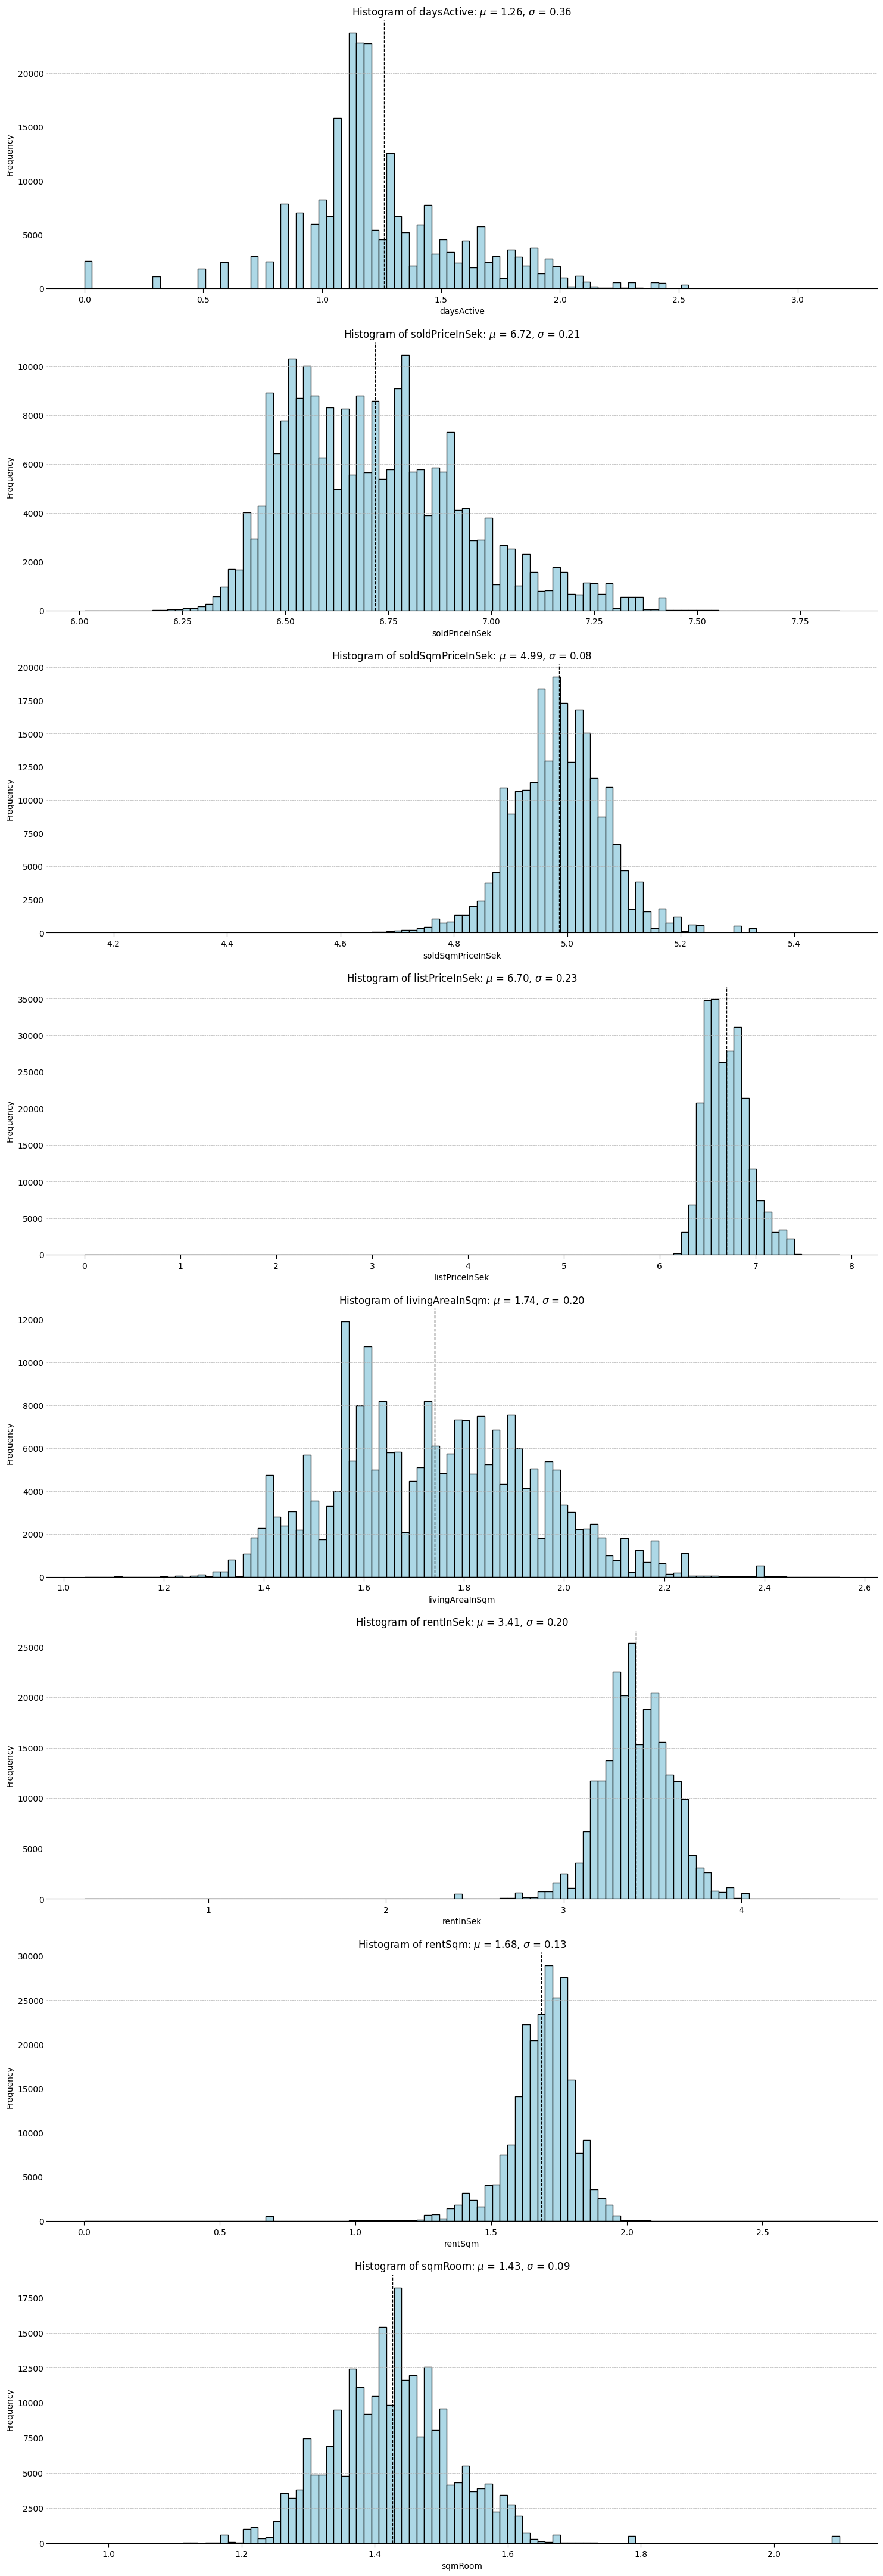

In [47]:
fig, axs = plt.subplots(nrows = 8, figsize = (18,55))

plot_distribution(df_values, "daysActive", axs[0])
plot_distribution(df_values, "soldPriceInSek", axs[1])
plot_distribution(df_values, "soldSqmPriceInSek", axs[2])
plot_distribution(df_values, "listPriceInSek", axs[3])
plot_distribution(df_values, "livingAreaInSqm", axs[4])
plot_distribution(df_values, "rentInSek", axs[5])
plot_distribution(df_values, "rentSqm", axs[6])
plot_distribution(df_values, "sqmRoom", axs[7])

## Mergin Features

In [48]:
df_features = pd.merge(pd.merge(df_values, df_category, left_index = True, right_index = True), df_dates, left_index = True, right_index = True)
df_features.head()

,constructionYear,descriptiveAreaName,daysActive,soldDate,latitude,longitude,soldPriceInSek,rentInSek,soldSqmPriceInSek,soldPriceVsListPriceDiffInSek,soldPriceVsListPriceDiffInPercentage,listPriceInSek,livingAreaInSqm,numberOfRooms,floorNumber,dateKey,CPIF,rentSqm,sqmRoom,area_Birkastan,area_Birkastan Vasastan,area_Centrum,area_Centrum Norrmalm Vasastan,area_City,area_Ekhagen,area_Essingeöarna,area_Fredhäll,area_Fridhemsplan,area_Gamla Stan,area_Gärdet,area_Gårdshus,area_Hagamalm,area_Hagastaden,area_Hagastaden Vasastan,area_Hjorthagen,area_Hornsbergs Strand,area_Hornstull,area_Högalid,area_Högst,area_Katarina,area_Katarina/Sofia,area_Kristineberg,area_Kungsholmen,area_Kungsholmen Fredhäll,area_Kungsholmen Fridhemsplan,area_Kungsholmen Hornsbergs Strand,area_Kungsholmen Kristineberg,area_Kungsholmen Lilla Essingen,area_Kungsholmen Nedre,area_Kungsholmen Norr Mälarstrand,area_Kungsholmen Rådhuset,area_Kungsholmen Thorildsplan,area_Kungsholmen-Hornsbergs Strand,area_Lilla Essingen,area_Lilla Essingen - Kungsholmen,area_Lilla Essingen Kungsholmen,area_Maria,area_Maria/Gamla Stan/Högalid,area_Mariaberget,area_Mariatorget,area_Marieberg,area_Nedre Gärdet,area_Nedre Kungsholmen,area_Norr Mälarstrand,area_Norra Djurgården,area_Norra Djurgårdsstaden,area_Norrmalm,area_Odenplan,area_Reimersholme,area_Sabbatsberg/Atlas,area_Sibirien,area_Sofia,area_St Erik,area_St Göran,area_Stora Essingen,area_Södermalm,area_Södermalm Hornstull,area_Södermalm Högalid,area_Södermalm Katarina,area_Södermalm Maria,area_Södermalm Maria Magdalena,area_Södermalm SoFo,area_Södermalm Sofia,area_Södermalm-Högalid,area_Södermalm-Katarina,area_Södermalm-Maria,area_Södermalm-Sofia,area_Södermalm-Sofo,area_Thorildsplan,area_Tule,area_Tullgården,area_Vasastan,area_Vasastan - Birkastan,area_Vasastan - Odenplan,area_Vasastan Birkastan,area_Vasastan Hagastaden,area_Vasastan Norrmalm,area_Vasastan Odenplan,area_Vasastan Sibirien,area_Vasastan Östermalm,area_Östermalm,area_Östermalm / Gärdet,area_Östermalm / Nedre Gärdet,area_Östermalm Gärdet,area_Östra Kungsholmen,soldMonth,soldDayOfWeek,soldWeekOfYear,soldQuarter,marketDayOfWeek
booliId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
598032,2006.0,Kungsholmen,1.602060,2013-02-11,59.334000,18.023153,6.617000,3.638789,4.716638,-360000.0,-8.0,6.653213,1.905796,3.0,6.0,2013-02,0.9,1.746184,1.439333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,7,1,3
688449,1935.0,Östermalm Ekhagen,1.146128,2020-09-10,59.372300,18.055624,6.752049,3.635081,4.906954,655000.0,13.1,6.698536,1.851258,3.0,1.0,2020-09,0.3,1.796872,1.386202,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,3,37,3,4
692069,1959.0,Östermalm,1.146128,2014-04-30,59.336461,18.100154,7.045323,3.782831,4.918224,1150000.0,11.6,6.997823,2.130334,4.0,5.0,2014-04,0.5,1.665147,1.537819,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,2,18,2,3
796496,1892.0,Östermalm,1.230449,2014-04-25,59.340750,18.082264,7.014940,3.593397,4.939399,1350000.0,15.0,6.954243,2.079181,4.0,2.0,2014-04,0.5,1.530727,1.487845,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,4,17,2,2
871388,1936.0,Södermalm,1.204120,2013-03-28,59.311852,18.069763,6.628389,3.666705,4.741908,-100000.0,-2.3,6.638489,1.892095,3.0,5.0,2013-03,0.9,1.787267,1.425969,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,13,1,2


In [49]:
df_features.describe()

,constructionYear,daysActive,latitude,longitude,soldPriceInSek,rentInSek,soldSqmPriceInSek,soldPriceVsListPriceDiffInSek,soldPriceVsListPriceDiffInPercentage,listPriceInSek,livingAreaInSqm,numberOfRooms,floorNumber,CPIF,rentSqm,sqmRoom,area_Birkastan,area_Birkastan Vasastan,area_Centrum,area_Centrum Norrmalm Vasastan,area_City,area_Ekhagen,area_Essingeöarna,area_Fredhäll,area_Fridhemsplan,area_Gamla Stan,area_Gärdet,area_Gårdshus,area_Hagamalm,area_Hagastaden,area_Hagastaden Vasastan,area_Hjorthagen,area_Hornsbergs Strand,area_Hornstull,area_Högalid,area_Högst,area_Katarina,area_Katarina/Sofia,area_Kristineberg,area_Kungsholmen,area_Kungsholmen Fredhäll,area_Kungsholmen Fridhemsplan,area_Kungsholmen Hornsbergs Strand,area_Kungsholmen Kristineberg,area_Kungsholmen Lilla Essingen,area_Kungsholmen Nedre,area_Kungsholmen Norr Mälarstrand,area_Kungsholmen Rådhuset,area_Kungsholmen Thorildsplan,area_Kungsholmen-Hornsbergs Strand,area_Lilla Essingen,area_Lilla Essingen - Kungsholmen,area_Lilla Essingen Kungsholmen,area_Maria,area_Maria/Gamla Stan/Högalid,area_Mariaberget,area_Mariatorget,area_Marieberg,area_Nedre Gärdet,area_Nedre Kungsholmen,area_Norr Mälarstrand,area_Norra Djurgården,area_Norra Djurgårdsstaden,area_Norrmalm,area_Odenplan,area_Reimersholme,area_Sabbatsberg/Atlas,area_Sibirien,area_Sofia,area_St Erik,area_St Göran,area_Stora Essingen,area_Södermalm,area_Södermalm Hornstull,area_Södermalm Högalid,area_Södermalm Katarina,area_Södermalm Maria,area_Södermalm Maria Magdalena,area_Södermalm SoFo,area_Södermalm Sofia,area_Södermalm-Högalid,area_Södermalm-Katarina,area_Södermalm-Maria,area_Södermalm-Sofia,area_Södermalm-Sofo,area_Thorildsplan,area_Tule,area_Tullgården,area_Vasastan,area_Vasastan - Birkastan,area_Vasastan - Odenplan,area_Vasastan Birkastan,area_Vasastan Hagastaden,area_Vasastan Norrmalm,area_Vasastan Odenplan,area_Vasastan Sibirien,area_Vasastan Östermalm,area_Östermalm,area_Östermalm / Gärdet,area_Östermalm / Nedre Gärdet,area_Östermalm Gärdet,area_Östra Kungsholmen,soldMonth,soldDayOfWeek,soldWeekOfYear,soldQuarter,marketDayOfWeek
count,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,10482232.0,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07,1.048223e+07
mean,1.936742e+03,1.297997e+00,5.933150e+01,1.805598e+01,6.734364e+00,3.414509e+00,4.997111e+00,1.089434e+05,inf,6.722134e+00,1.745975e+00,2.331342e+00,2.996225e+00,9.448497e+00,1.686644e+00,1.427373e+00,6.310202e-03,3.141793e-03,3.145322e-04,6.677967e-06,6.964166e-06,1.297434e-05,3.191877e-03,2.051538e-02,6.264601e-03,4.054480e-05,4.263939e-02,6.296369e-06,1.173414e-05,3.240817e-03,4.865376e-06,1.264864e-02,6.269275e-03,6.305432e-03,1.258825e-02,6.200969e-06,6.362481e-03,7.536563e-06,3.901173e-03,1.661536e-01,8.

## Replace Outliers

In [52]:
def replace_outliers_with_mean_using_IQR(df):
    df_copy = df.copy(deep = True)
    df_copy.dropna(inplace = True)
    
    for col in df.select_dtypes(include = np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2 * IQR
        upper_bound = Q3 + 2 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape
        mean = df_copy[(df[col] > lower_bound) | (df[col] < upper_bound)][col].mean()
        df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = mean

        print(f'Replaced {outliers[0]} from column: {col}')

    return df

df_features = replace_outliers_with_mean_using_IQR(df_features)

Replaced 36367 from column: constructionYear
Replaced 216157 from column: daysActive
Replaced 0 from column: latitude
Replaced 2 from column: longitude
Replaced 51 from column: soldPriceInSek
Replaced 66058 from column: rentInSek
Replaced 84174 from column: soldSqmPriceInSek
Replaced 558222 from column: soldPriceVsListPriceDiffInSek
Replaced 156345 from column: soldPriceVsListPriceDiffInPercentage
Replaced 45 from column: listPriceInSek
Replaced 10 from column: livingAreaInSqm
Replaced 99918 from column: numberOfRooms
Replaced 41221 from column: floorNumber
Replaced 71673 from column: CPIF
Replaced 165928 from column: rentSqm
Replaced 65617 from column: sqmRoom
Replaced 66145 from column: area_Birkastan
Replaced 32933 from column: area_Birkastan Vasastan
Replaced 3297 from column: area_Centrum
Replaced 70 from column: area_Centrum Norrmalm Vasastan
Replaced 73 from column: area_City
Replaced 136 from column: area_Ekhagen
Replaced 33458 from column: area_Essingeöarna
Replaced 215047 fro

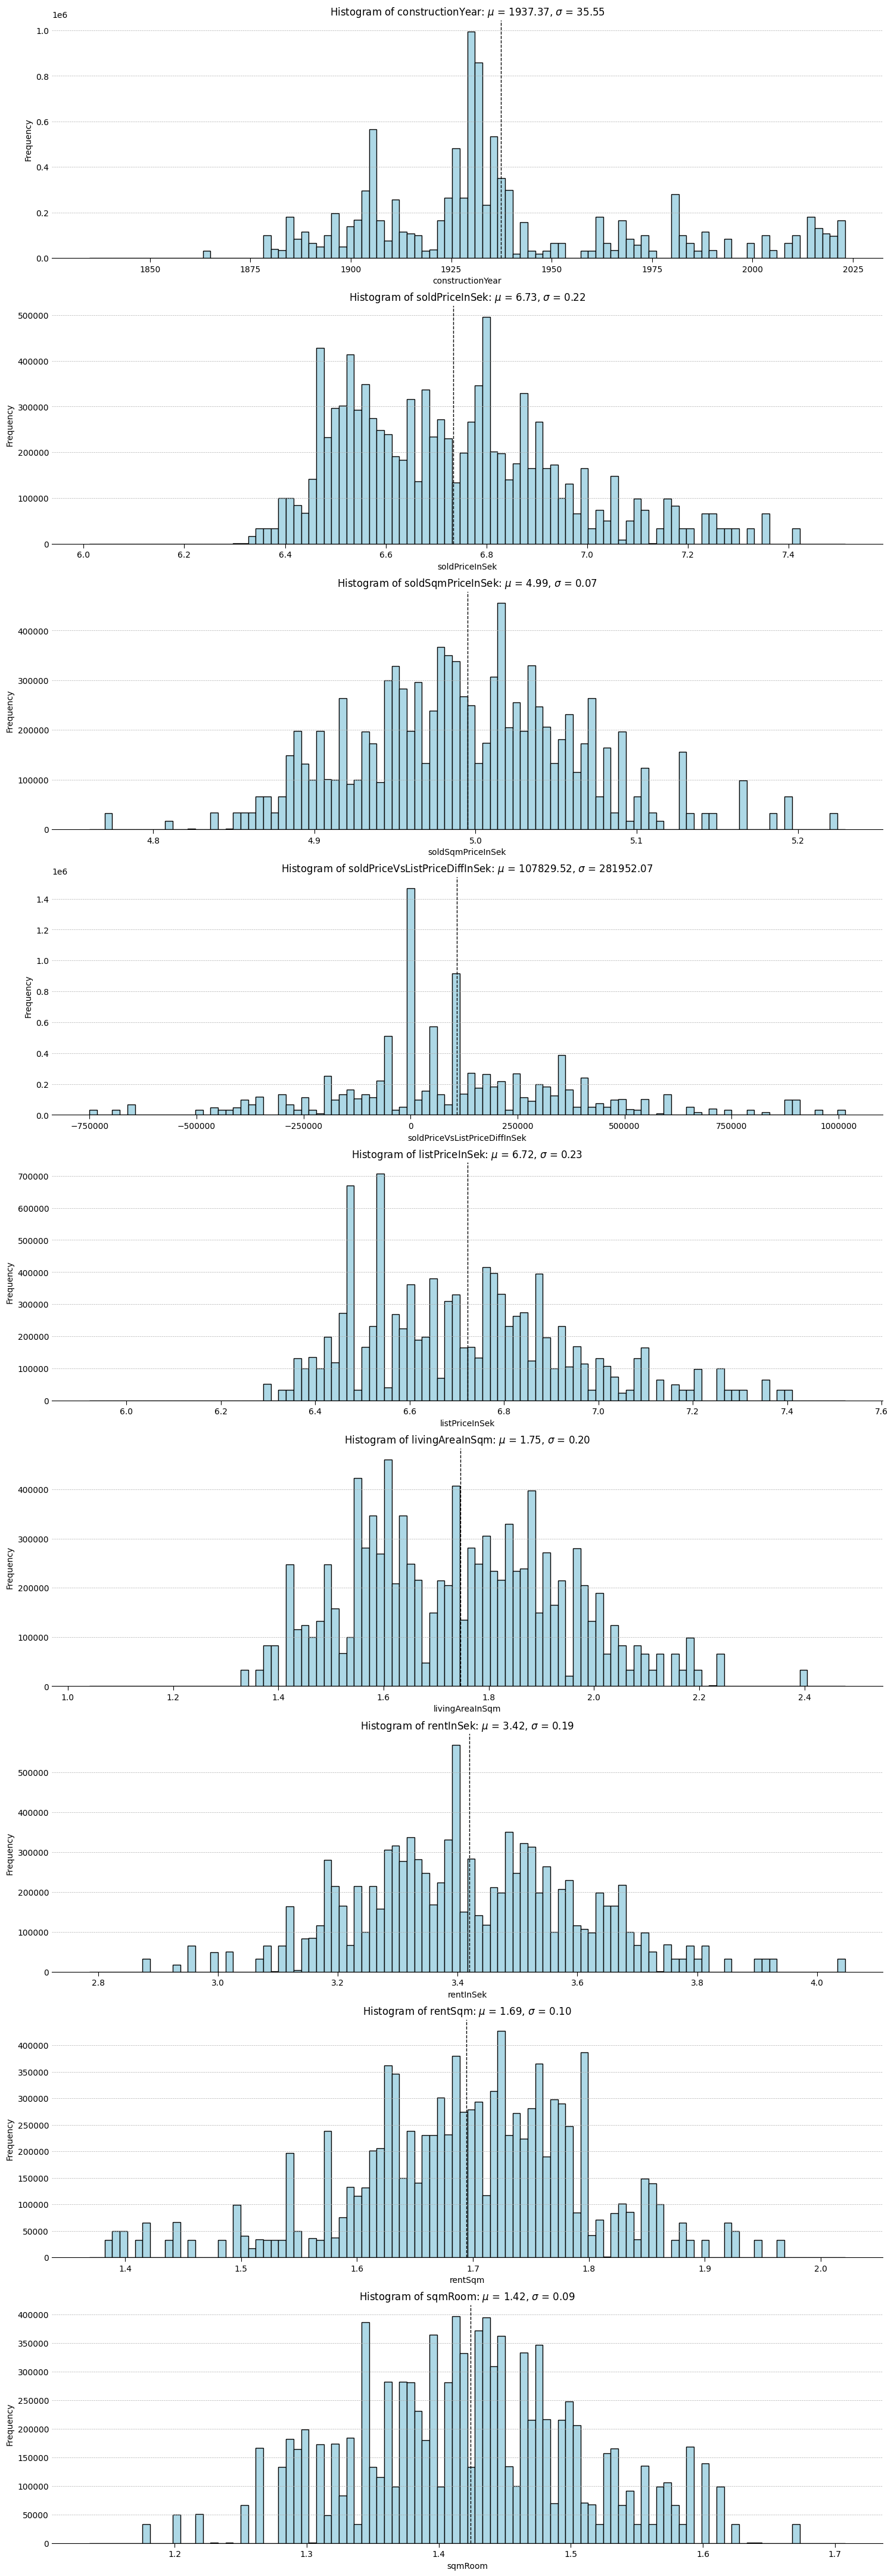

In [53]:
fig, axs = plt.subplots(nrows = 9, figsize = (18,55))
plot_distribution(df_features, "constructionYear", axs[0])
plot_distribution(df_features, "soldPriceInSek", axs[1])
plot_distribution(df_features, "soldSqmPriceInSek", axs[2])
plot_distribution(df_features, "soldPriceVsListPriceDiffInSek", axs[3])
plot_distribution(df_features, "listPriceInSek", axs[4])
plot_distribution(df_features, "livingAreaInSqm", axs[5])
plot_distribution(df_features, "rentInSek", axs[6])
plot_distribution(df_features, "rentSqm", axs[7])
plot_distribution(df_features, "sqmRoom", axs[8])

## Remove Features Based on VIF

In [54]:
def get_feature_vif(df):
    X = add_constant(df)
    df_vif = pd.DataFrame(X.columns, columns = ["Feature"])
    df_vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return df_vif

df_vif = get_feature_vif(df_features)
df_vif.head()

MemoryError: Unable to allocate 8.67 GiB for an array with shape (111, 10482232) and data type object

In [ ]:
vif_cols = df_vif[(df_vif.VIF >= 10) & (~df_vif.Feature.isin(["const", "soldPriceInSek", "listPriceInSek", "livingAreaInSqm"]))]["Feature"]
vif_cols

98          soldMonth
100    soldWeekOfYear
101       soldQuarter
Name: Feature, dtype: object

In [ ]:
df_features = df_features.drop(columns = vif_cols)
df_features.head()

,constructionYear,daysActive,latitude,longitude,soldPriceInSek,rentInSek,soldSqmPriceInSek,soldPriceVsListPriceDiffInSek,soldPriceVsListPriceDiffInPercentage,listPriceInSek,livingAreaInSqm,numberOfRooms,floorNumber,area_Birkastan,area_Birkastan Vasastan,area_Centrum,area_Centrum Norrmalm Vasastan,area_City,area_Ekhagen,area_Essingeöarna,area_Fredhäll,area_Fridhemsplan,area_Gamla Stan,area_Gärdet,area_Gårdshus,area_Hagamalm,area_Hagastaden,area_Hagastaden Vasastan,area_Hjorthagen,area_Hornsbergs Strand,area_Hornstull,area_Högalid,area_Högst,area_Katarina,area_Katarina/Sofia,area_Kristineberg,area_Kungsholmen,area_Kungsholmen Fredhäll,area_Kungsholmen Fridhemsplan,area_Kungsholmen Hornsbergs Strand,area_Kungsholmen Kristineberg,area_Kungsholmen Lilla Essingen,area_Kungsholmen Nedre,area_Kungsholmen Norr Mälarstrand,area_Kungsholmen Rådhuset,area_Kungsholmen Thorildsplan,area_Kungsholmen-Hornsbergs Strand,area_Lilla Essingen,area_Lilla Essingen - Kungsholmen,area_Lilla Essingen Kungsholmen,area_Maria,area_Maria/Gamla Stan/Högalid,area_Mariaberget,area_Mariatorget,area_Nedre Gärdet,area_Nedre Kungsholmen,area_Norr Mälarstrand,area_Norra Djurgården,area_Norra Djurgårdsstaden,area_Norrmalm,area_Odenplan,area_Reimersholme,area_Sabbatsberg/Atlas,area_Sibirien,area_Sofia,area_St Erik,area_St Göran,area_Stora Essingen,area_Södermalm,area_Södermalm Hornstull,area_Södermalm Högalid,area_Södermalm Katarina,area_Södermalm Maria,area_Södermalm Maria Magdalena,area_Södermalm SoFo,area_Södermalm Sofia,area_Södermalm-Högalid,area_Södermalm-Katarina,area_Södermalm-Maria,area_Södermalm-Sofia,area_Södermalm-Sofo,area_Thorildsplan,area_Tule,area_Tullgården,area_Vasastan,area_Vasastan - Birkastan,area_Vasastan - Odenplan,area_Vasastan Birkastan,area_Vasastan Norrmalm,area_Vasastan Odenplan,area_Vasastan Sibirien,area_Vasastan Östermalm,area_Östermalm,area_Östermalm / Gärdet,area_Östermalm / Nedre Gärdet,area_Östermalm Gärdet,area_Östra Kungsholmen,soldDayOfWeek,marketDayOfWeek
booliId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1313807,1932.0,1.146128,59.336983,18.024736,6.324283,3.232742,4.756088,110000.0,5.5,6.301030,1.579784,1.5,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,3.0
1275300,1930.0,1.255273,59.338768,18.022543,6.302115,3.245513,4.824997,10000.0,0.5,6.299943,1.491362,1.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,3.0
1290019,1912.0,1.176091,59.330952,18.029498,6.599883,3.112605,4.814561,185000.0,4.9,6.579212,1.792392,2.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0
1317787,1997.0,1.113943,59.333504,18.042007,6.568202,3.619824,4.726222,105000.0,2.9,6.555699,1.848189,2.5,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,4.0
1281194,1984.0,1.079181,59.314210,18.079580,6.531479,3.504471,4.760634,150000.0,4.6,6.511883,1.778151,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,4.0


# 2. Saving Feature Data to Pickle

In [ ]:
# parquet_file = df.to_parquet(index = False)
# azure_utils.upload_csv_to_datalake(df, f"silver/sold_clean", f"Sold_{date.today()}.csv")
df_features.to_pickle("features.pkl")